<a href="https://colab.research.google.com/github/abdellahML/colab/blob/main/5_object_recognition_drills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object recognition drills

You've seen an example of a simple neural network in the [previous](./3.object_recognition_with_keras.ipynb) [chapters](./4.object_recognition_with_pytorch.ipynb), but can you make your own as well? Let's flex our neural skills and **extend** the model from the previous chapter.

## Multiple classes

The previous model was alright in separating cats from dogs, but what if we want to add on more classes? Extend the previous model by **adding more classes** from the Google ["quick,draw!" dataset](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap). 

Choose 6 classes of your own, train and test your model as shown in the previous notebook. You might need to change the model structure a bit to deal with the new classes. Hint: choose yourself some visually distinct classes to make your life a bit easier.

You can choose whether you want to use keras or pytorch.

In [ ]:
# extend the model shown in the previous chapter to recognise 6 different classes
  #storage.googleapis.com in place of storage.google.com

In [2]:
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dragon.npy -P ../assets/

--2021-03-16 08:12:53--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119292736 (114M) [application/octet-stream]
Saving to: ‘../assets/dog.npy’

dog.npy             100%[===================>] 113.77M  93.0MB/s    in 1.2s    

2021-03-16 08:12:54 (93.0 MB/s) - ‘../assets/dog.npy’ saved [119292736/119292736]

--2021-03-16 08:12:54--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96590448 (92M) [applicatio

Text(0, 0.5, 'number of samples')

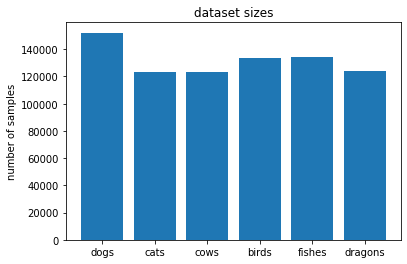

In [3]:
import numpy as np
from matplotlib import pyplot as plt
dogs = np.load("../assets/dog.npy")
cats = np.load("../assets/cat.npy")
cows = np.load("../assets/cow.npy")
birds = np.load("../assets/bird.npy")
fishes = np.load("../assets/fish.npy")
dragons = np.load("../assets/dragon.npy")

plt.bar([0,1,2,3,4,5], [dogs.shape[0], cats.shape[0], cows.shape[0], 
                birds.shape[0], fishes.shape[0], dragons.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1,2,3,4,5], ['dogs', 'cats', 'cows', 'birds', 'fishes', 'dragons'])
plt.ylabel('number of samples')

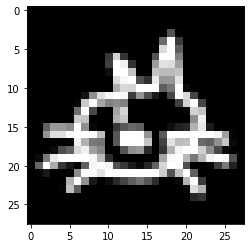

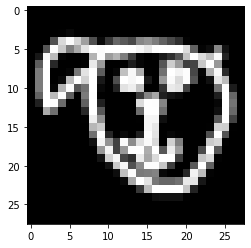

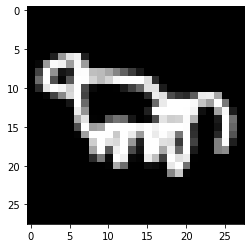

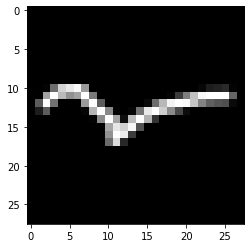

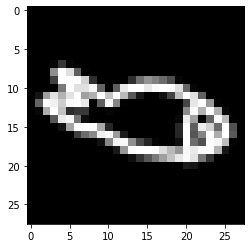

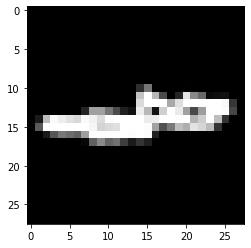

In [4]:
samples = [cats, dogs, cows, birds, fishes, dragons]
for i in samples:
  plt.imshow(i[0].reshape(28,28), cmap="gray")
  plt.show()

In [5]:
samples = [ cats, dogs, cows, birds, fishes, dragons]
max_samples = min(i.shape[0] for i in samples)
print(max_samples)

123083


Text(0, 0.5, 'number of samples')

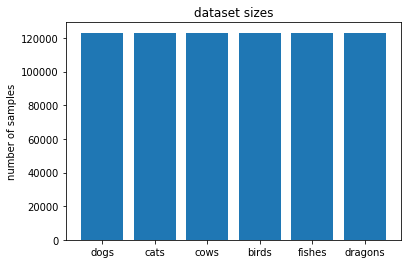

In [7]:
preprocessed_cats = cats[:max_samples].reshape(-1,28,28)
preprocessed_dogs = dogs[:max_samples].reshape(-1,28,28)
preprocessed_cows = cows[:max_samples].reshape(-1,28,28)
preprocessed_birds = birds[:max_samples].reshape(-1,28,28)
preprocessed_fishes = fishes[:max_samples].reshape(-1,28,28)
preprocessed_dragons = dragons[:max_samples].reshape(-1,28,28)


plt.bar([0,1,2,3,4,5], [preprocessed_cats.shape[0], preprocessed_cats.shape[0], preprocessed_cows.shape[0], preprocessed_birds.shape[0], preprocessed_fishes.shape[0], preprocessed_dragons.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1,2,3,4,5], ['dogs', 'cats', 'cows', 'birds', 'fishes', 'dragons'])
plt.ylabel('number of samples')

In [8]:
cat_labels = np.zeros((max_samples, 1))
dog_labels = np.ones((max_samples, 1))
cow_labels = np.full((max_samples, 1), 2)
bird_labels = np.full((max_samples, 1), 3)
fish_labels = np.full((max_samples, 1), 4)
dragon_labels = np.full((max_samples, 1), 5)

In [9]:
import tensorflow as tf

labels = np.concatenate([cat_labels, dog_labels, cow_labels,
                         bird_labels, fish_labels, dragon_labels])
labels = tf.keras.utils.to_categorical(labels, num_classes=6)
                                                                  # the order of concatenate in labels and drawings has to be the same or the tf.keras.utils.to_categorical wont work out
drawings = np.concatenate([preprocessed_cats, preprocessed_dogs, preprocessed_cows
                           , preprocessed_birds, preprocessed_fishes, preprocessed_dragons]) 

# tensorflow wants a 4D tensor with (n_images, width, height, colour_depth)
print("Drawings shape before : ", drawings.shape)
drawings = np.expand_dims(drawings, axis=3)
print("Drawings shape after : ", drawings.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (738498, 28, 28)
Drawings shape after :  (738498, 28, 28, 1)
Label shape :  (738498, 6)


In [10]:
from sklearn.model_selection import train_test_split

train_drawings, test_drawings, train_labels, test_labels = train_test_split(
    drawings, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

print("train_drawings shape : ", train_drawings.shape)
print("test_drawings shape : ", test_drawings.shape)
print("train_labels shape : ", train_labels.shape)
print("test_labels shape : ", test_labels.shape)

train_drawings shape :  (590798, 28, 28, 1)
test_drawings shape :  (147700, 28, 28, 1)
train_labels shape :  (590798, 6)
test_labels shape :  (147700, 6)


(147700, 6)

(147700, 28, 28, 1)

In [12]:
from tensorflow.keras import models, layers
input_size = 28
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))                 #deactivate half of the preceeding layer
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.5))                 #deactivate half of the preceeding layer
model.add(layers.Dense(6, activation='softmax')) # 6 classes
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [18]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',          # sparse_categorical_crossentropy works only with binary output??? 
              metrics=['accuracy'])

history = model.fit(train_drawings, train_labels, epochs=6, 
                    validation_data=(test_drawings, test_labels))

Epoch 1/6
18463/18463 [==============================] - 542s 29ms/step - loss: 1.8680 - accuracy: 0.1682 - val_loss: 1.7918 - val_accuracy: 0.1664
Epoch 2/6
18463/18463 [==============================] - 541s 29ms/step - loss: 1.7919 - accuracy: 0.1664 - val_loss: 1.7919 - val_accuracy: 0.1663
Epoch 3/6
18463/18463 [==============================] - 535s 29ms/step - loss: 1.7919 - accuracy: 0.1668 - val_loss: 1.7923 - val_accuracy: 0.1663
Epoch 4/6
18463/18463 [==============================] - 537s 29ms/step - loss: 1.7919 - accuracy: 0.1658 - val_loss: 1.7918 - val_accuracy: 0.1663
Epoch 5/6
18463/18463 [==============================] - 535s 29ms/step - loss: 1.7919 - accuracy: 0.1655 - val_loss: 1.7918 - val_accuracy: 0.1665
Epoch 6/6
18463/18463 [==============================] - 539s 29ms/step - loss: 1.7919 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1663


In [ ]:
#model.save('model_colab_88%')  #to save a model

4616/4616 - 32s - loss: 1.7918 - accuracy: 0.1663


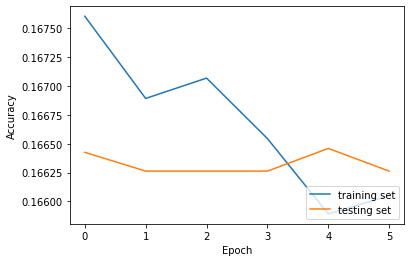

In [19]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_drawings,  test_labels, verbose=2)

# changing the neural network

In [20]:
input_size = 28
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 1)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', ))
# model.add(layers.Conv2D(16, kernel_size = (5, 5), activation='relu', ))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.5)) 
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax')) 
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 28)                358428    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
Total params: 385,458
Trainable params: 385,458
Non-trainable params: 0
________________________________________________

In [22]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_drawings, train_labels, epochs=6, validation_data=(test_drawings, test_labels))

Epoch 1/6
18463/18463 [==============================] - 1698s 92ms/step - loss: 0.8978 - accuracy: 0.6926 - val_loss: 0.5455 - val_accuracy: 0.8062
Epoch 2/6
18463/18463 [==============================] - 1691s 92ms/step - loss: 0.5105 - accuracy: 0.8194 - val_loss: 0.4991 - val_accuracy: 0.8218
Epoch 3/6
18463/18463 [==============================] - 1692s 92ms/step - loss: 0.4565 - accuracy: 0.8392 - val_loss: 0.4988 - val_accuracy: 0.8278
Epoch 4/6
18463/18463 [==============================] - 1685s 91ms/step - loss: 0.4235 - accuracy: 0.8518 - val_loss: 0.4965 - val_accuracy: 0.8290
Epoch 5/6
18463/18463 [==============================] - 1706s 92ms/step - loss: 0.3989 - accuracy: 0.8608 - val_loss: 0.5056 - val_accuracy: 0.8275
Epoch 6/6
18463/18463 [==============================] - 1692s 92ms/step - loss: 0.3808 - accuracy: 0.8671 - val_loss: 0.5109 - val_accuracy: 0.8265


In [24]:
model.save('model_colab_86,71%')  #to save a model...86.71% on training (6 epochs) and 82,90%on test set (epoch = 4)

INFO:tensorflow:Assets written to: model_colab_86,71%/assets


4616/4616 - 82s - loss: 0.5109 - accuracy: 0.8265


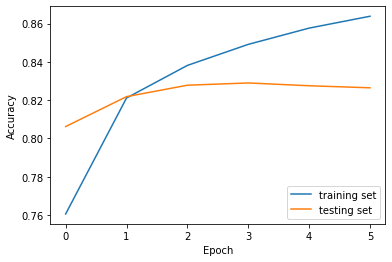

In [23]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_drawings,  test_labels, verbose=2)

# or to save the model training data

In [ ]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])
print('compiled')

In [ ]:
# #from tensorflow.keras.utils import plot_model
# #plot_model(best_model, show_shapes=True)

# batch_size = 320

# #this line is for saving our model training data to use it afterwards with model.load_weights('cnn_from_scratch_fruits.hdf5') we can load it
# checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# #early_stop exit too, i have to check

# history = model.fit(x_train, y_train,
#                     batch_size = batch_size,
#                     epochs = 3
#                     validation_data=(x_test, y_test),
#                     callbacks = [chekpointer],
#                     shuffle=True) 

## Full-color dataset

Drawings are nice, but how good are CNN's for nice color pictures? Download [this](https://www.kaggle.com/moltean/fruits) dataset to get pictures of fruits and vegetables. Design and evaluate a CNN to classify these (remember; these are RGB color pictures).

Hint: take some inspiration from already successful and [popular CNN architectures](https://www.topbots.com/important-cnn-architectures/), from [keras built-in NN models](https://keras.io/api/applications/) or [pytorch built-in ones](https://pytorch.org/vision/0.8/models.html).

PS: You can create a separate repository for this project.

In [ ]:
# Design and evaluate a CNN for classifying fruits and vegetables

In [25]:
# !pip3 install -q kaggle

In [27]:
from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from google.colab import files

files.upload()

KeyboardInterrupt: ignored

In [ ]:
!mkdir ~/.kaggle
#1.pip install kaggle
#2.cd ~/.kaggle
#3.homepage www.kaggle.com -> Your Account -> Create New API token
#4.mv ~/Downloads/kaggle.json ./
#5.chmod 600 ./kaggle.json

In [ ]:
!cd ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset
!kaggle datasets download -d moltean/fruits

In [ ]:
# unzip dataset
!unzip -u "/content/fruits" -d "/content/"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D   # >>no need to put layers.Conv2D, just Conv2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [ ]:
img = mpimg.imread('/content/fruits-360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
plt.imshow(img)

In [ ]:
img = mpimg.imread('/content/fruits-360/Training/Beetroot/101_100.jpg')
print(img.shape)
plt.imshow(img)

In [ ]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("/content/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("/content/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("/content/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("/content/fruits-360/Test/"+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

In [ ]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(test_categories))
plt.bar(index, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()

In [ ]:
from sklearn.datasets import load_files
train_dir = '/content/fruits-360/Training/'
test_dir = '/content/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
X_train, y_train,target_labels = load_dataset(train_dir)
X_test, y_test,_ = load_dataset(test_dir)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# number of labels
nlabels = len(np.unique(y_train))
nlabels

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,nlabels)
y_test = np_utils.to_categorical(y_test,nlabels)
y_train[0]

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
x_test,x_valid = X_test[:7000],X_test[7000:10000]
y_test,y_vaild = y_test[:7000],y_test[7000:10000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
      #convert to numpy Array
        images_array.append(img_to_array(load_img(file)))
    return images_array

In [ ]:
x_train = convert_image_to_array_form(X_train)
x_train = np.array(x_train)
#images_array=[]
#for file in X_train:
#  images_array.append(img_to_array(load_img(file)))
#x_train = images_array
print('Training set shape : ',x_train.shape)

In [ ]:
#print('Training set shape : ',len(x_train))

In [ ]:
x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

In [ ]:
x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

In [ ]:
# !!!! VERY imporatant, it reduces the line needed to train ???
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D   # >>no need to put layers.Conv2D, just Conv2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout

In [ ]:
model = models.Sequential()
model.add(Conv2D(filters= 16, kernel_size = (5, 5), activation='relu'))
#with kernel 2 instead of (5,5), poll_size 2 and without strides, it is FASTER
model.add(MaxPooling2D(pool_size=(2), strides=(2, 2), padding='same'))

model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size = (5, 5), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, kernel_size = (5, 5), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))

model.add(layers.Dense(nlabels, activation='softmax')) # 6 classes
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])



In [ ]:
#from tensorflow.keras.utils import plot_model
#plot_model(best_model, show_shapes=True)

batch_size = 320

#this line is for saving our model training data to use it afterwards with model.load_weights('cnn_from_scratch_fruits.hdf5') we can load it
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

#early_stop exit too, i have to check

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = 3
                    validation_data=(x_test, y_test),
                    callbacks = [chekpointer],
                    shuffle=True) 

## Visualizing feature extraction

Alright, time for some nice visualizations! Neural networks are notoriously **hard to interpret**, and all their hidden variables make for a very **unobservable** transformation. How can we, as humans, still visualize our neural network, though?

We can visualize the feature maps, which is what each convolutional layer 'sees' after the filters are applied. Follow the steps described in [this article](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/) to try this out on your fruit CNN!

PS: You can have this in the same repo as your Fruit CNN

In [ ]:
# Visualize the feature maps of your fruit CNN